# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

List only the BITS (Name) of active contributors in this assignment:
1. ___________________
2. __________________
3. ____________________
4. ___________________
5. ___________________

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [1]:
#Code Block : Set Initial State (Must handle dynamic inputs)

In [2]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

# 2-  A* and Heuristic fucntion

In [1]:
class Graph:

    def __init__(self, ):
        self.start_node = None
        self.end_node = None
        self.graph_matrix = []
        self.nodes_registry = {}
        self.nodes_id_registry = {}
        self.paths = []
        self.node_counter = 0
        self.cost_registry = {}
        self.MAX_CHAR_LEN = 0
    
    
    # Pretty print the graph_matrix
    def print_matrix(self, ):
        for row_index, row in enumerate(self.graph_matrix):
            # If First Row, then print the column node name before the matrix
            if row_index == 0:
                column_headers = ['/',]
                column_headers.extend(list(self.nodes_registry.keys()))
                for cell in column_headers:
                    self.cell_print(cell, end='')
                print('\n')
            for col_index, col in enumerate(row):
                # If First Column, then print the row node name beofre the matrix
                if col_index == 0:
                    self.cell_print(f'{list(self.nodes_registry.keys())[row_index]}', end='')
                if self.graph_matrix[row_index][col_index] is None:
                    #print(f' {nodes_encoding[row_index][col_index][0] * nodes_encoding[row_index][col_index][1]} ')
                    self.cell_print('-', end='')
                else:
                    self.cell_print(f'{self.graph_matrix[row_index][col_index]}', end='')
            print('\n')

    # We keep a function which calculates the maximum character length of any float value or node name
    # This is necessary because when we print our matrix, we want it to appear 'good-looking'
    # In terms of character padding
    def update_max_charlen(self, input_value):
        # Convert this value to string
        input_value = str(input_value)
        self.MAX_CHAR_LEN = max(self.MAX_CHAR_LEN, len(input_value))

    def cell_print(self, input_value, end=''):

        pad_factor = self.MAX_CHAR_LEN - len(str(input_value))
        pad_before = ' '*(int(pad_factor/2))

        pad_after = ' '*(pad_factor - int(pad_factor/2))
        #print('CELL: ', input_value, ' LEN INPUT: ', len(str(input_value)), ' Max Len: ', self.MAX_CHAR_LEN)
        print(f'|{pad_before}{str(input_value)}{pad_after}', end=end)

    def register_node(self, node_name):
        if self.nodes_registry.get(node_name, False) != False:
            # Do Nothing as the node is present
            pass
        else:
            self.node_counter+=1
            self.nodes_registry[node_name] = self.node_counter
            self.nodes_id_registry[self.node_counter] = node_name

        self.update_max_charlen(node_name)

    
    # Example Input of the Function: 
    # A, B, 5, 64
    # Node1, Node2, Time, Speed
    def register_input_cost(self, user_input_string):
        params_list = [x.strip() for x in user_input_string.split(',') if x]
        # Register nodes to keep track of unique nodes,
        # This will be helpful while generating the 2D Matrix
        self.register_node(params_list[0])
        self.register_node(params_list[1])
        
        # Register the cost
        # Example: if from Node1 to Node2, cost is 25, then register as:
        # cost_registry = {'Node1|Node2': 25, 'NodeN|NodeK':99, ...}
        travel_cost = float(params_list[2])*float(params_list[3])
        self.cost_registry[f'{params_list[0]}|{params_list[1]}'] = travel_cost
        
        # Because of undirected graph, register nodes and cost in Mirrored Format
        # Example: if cost from 1 to 3 is 10, then cost from 3 to 1 is also 10
        self.cost_registry[f'{params_list[1]}|{params_list[0]}'] = travel_cost
        
        self.update_max_charlen(str(travel_cost))
                      
    def convert_to_2D_graph(self, ):
        # Create a graph of None
        # This creates an nxn matrix where n is the number of unique nodes
        blank_row = [None]*len(self.nodes_registry.items())
        graph = [blank_row.copy() for i in range(len(blank_row))]
        
        for key, path_cost in self.cost_registry.items():
            node_1, node_2 = key.split('|')        
            graph[self.nodes_registry[node_1]-1][self.nodes_registry[node_2]-1] = path_cost
    
        self.graph_matrix = graph
    
    
    def register_start_end_node(self, user_input_string):
        self.start_node, self.end_node = [x.strip() for x in user_input_string.split(',')]



In [ ]:
# Take Input of the graph here

# There are threee states:
# STAGE 1 (default). Define Input costs State. Example Input: A, B, 5, 64
# STAGE 2. Define Start Node, End Node State. Example Input: A, B
# 3. End Input State. Example Input: '-E-'
# 4. Switch Input State. Example Input: '-S-'

graph = Graph()

input_states = ['define_input_costs', 'define_start_end_node']
INPUT_STATES_COUNT = len(input_states)

# Always start with input stage = 0
input_stage = 0

costs = []

while input_stage < INPUT_STATES_COUNT:
    user_input = input('Input: ')
    # End From taking Any Further Inputs
    if user_input == '-E-':
        break
    # Switch Input State
    elif user_input == '-S-':
        input_stage +=1
        if input_stage >= INPUT_STATES_COUNT:
            break
        else:
            continue
    # It means we need to start defining input costs
    if input_states[input_stage] == 'define_input_costs':
        graph.register_input_cost(user_input)
    elif input_states[input_stage] == 'define_start_end_node':
        graph.register_start_end_node(user_input)
        # Auto increment the stage
        input_stage +=1

In [2]:
class AStar(Graph):

    
    def __init__(self, ):
        super().__init__()
        self.total_path_cost = {}
        self.total_unique_paths = {}
        self.heuristic_values = {}
        
    def dfs(self, node, visited_nodes, initial_node, total_cost):
        if node == self.end_node:
            if self.total_unique_paths.get(initial_node, False) == False:
                self.total_unique_paths[initial_node] = 1
            else:
                self.total_unique_paths[initial_node] += 1
            
            if self.total_path_cost.get(initial_node, False) == False:
                self.total_path_cost[initial_node] = total_cost
            else:
                self.total_path_cost[initial_node] += total_cost
            # print('Terminated Traversal at: ', node, ' Visited: ', visited_nodes, ' Initial: ', initial_node, ' Total Cost So far: ', total_cost)
            
        else:
            visited_nodes[node] = True
            for col_index in range(len(self.graph_matrix[self.nodes_registry[node]-1])):
                # The node should not be visited and a valid travel cost must be present
                # If the travel cost is not none, that means we can travel with some incurred cost
                if visited_nodes.get(self.nodes_id_registry[col_index+1], False) == False\
                and not self.graph_matrix[self.nodes_registry[node]-1][col_index] is None:
                    # print(' Currently at: ', node, ' Traversing to: ', self.nodes_id_registry[col_index+1])
                    self.dfs(self.nodes_id_registry[col_index+1], visited_nodes, initial_node, total_cost+self.graph_matrix[self.nodes_registry[node]-1][col_index])
    
    def perform_goal_test(self, pool_of_nodes):
        for node in pool_of_nodes:
            if node['node_name'] == self.end_node:
                return node
        return None
        
    def find_min_from_pool(self, pool_of_nodes):
        minimum_cost_node = None 
        for node in pool_of_nodes:
            if minimum_cost_node is None:
                minimum_cost_node = node
            elif node['total_cost_till_goal'] < minimum_cost_node['total_cost_till_goal']:
                minimum_cost_node = node
        return minimum_cost_node
            
    def perform_heuristic_calculation(self, ):
        # For all nodes except goal node, start traversing in all directions
        for node, node_index in graph.nodes_registry.items():
            if (node == self.end_node):# or (node == self.start_node):
                pass
            else:
                self.dfs(node, {}, node, 0)
        
        for node in graph.nodes_registry.keys():
            if (node == self.end_node) or (node == self.start_node):
                self.heuristic_values[node] = 0
            else:
                self.heuristic_values[node] = self.total_path_cost[node]/self.total_unique_paths[node] 
    
    def delete_node_from_pool(self, pool_of_nodes, node):
        try:
            pool_of_nodes.remove(node)
            return True
        except ValueError as e:
            return False
        
    def get_neighbouring_nodes_and_cost(self, current_node):
        neighbour_pool = []
        # For All the neighbouring nodes of the current node
        for col_index in range(len(self.graph_matrix[self.nodes_registry[current_node['node_name']]-1])):
            # If there exits a Valid Path and the node should not already bein current_node's path
            # Meaning: It should not be already traversed
            if not self.graph_matrix[self.nodes_registry[current_node['node_name']]-1][col_index] is None\
            and not self.nodes_id_registry[col_index+1] in current_node['path']:
                
                neighbouring_node_name = self.nodes_id_registry[col_index+1]
                actual_cost_till_neighbour_node = current_node['actual_cost_till_node'] + self.graph_matrix[self.nodes_registry[current_node['node_name']]-1][col_index]
                estimated_cost_till_goal_node = actual_cost_till_neighbour_node + self.heuristic_values[neighbouring_node_name]
                
                path = current_node['path'].copy()
                path.append(neighbouring_node_name)
                
                neighbour_pool.append(
                    {'node_name': neighbouring_node_name, 'actual_cost_till_node': actual_cost_till_neighbour_node, 'total_cost_till_goal': estimated_cost_till_goal_node, 'path': path})
        return neighbour_pool
    
    def print_iteration_details(self, iteration_number, minimum_node, nodes_pool):
        print(f'\n\n-------- Start of Iteration {iteration_number+1} ----------')
        print('> Potential Nodes And Cost :')
        for node in nodes_pool:
            print(' Node: ', node['node_name'], ' Potential Cost till Goal: ', node['total_cost_till_goal'])
        print('> Expanding Node: ', minimum_node['node_name'])
        print(f'-------- End of Iteration {iteration_number+1} ----------')
    
    def print_goal_achievement(self, goal_test):
        print('\n\n---> Fianl Goal Reached ', goal_test['node_name'])
        print('\n---> Path Taken: ', ' >> '.join(goal_test['path']))
        print('\n---> Total Atual Cost Incurrend: ', goal_test['actual_cost_till_node'])
        
    def perform_a_star_calculation(self, ):
        iteration_number = 0
        # Start with the starting node only
        nodes_pool = [{'node_name': self.start_node, 'actual_cost_till_node': 0, 'total_cost_till_goal': 0, 'path':[self.start_node, ]}]
        
        # Try to check if any of nodes is Goal Node
        # Ideally this will be true only if start_node = end_node
        goal_test = self.perform_goal_test(nodes_pool)
        
        while len(nodes_pool) and not goal_test:
            minimum_node = self.find_min_from_pool(nodes_pool)
            self.print_iteration_details(iteration_number, minimum_node, nodes_pool)
            if not minimum_node is None:
                nodes_pool.extend(self.get_neighbouring_nodes_and_cost(minimum_node))
            self.delete_node_from_pool(nodes_pool, minimum_node)
            # print(nodes_pool)
            
            goal_test = self.perform_goal_test(nodes_pool)
            if goal_test:
                print('Goal Reached!')
            
            iteration_number +=1
        
        print(self.print_goal_achievement(goal_test))

### Verification & Beta Testing of A* Against a Sample Test Case as shown below

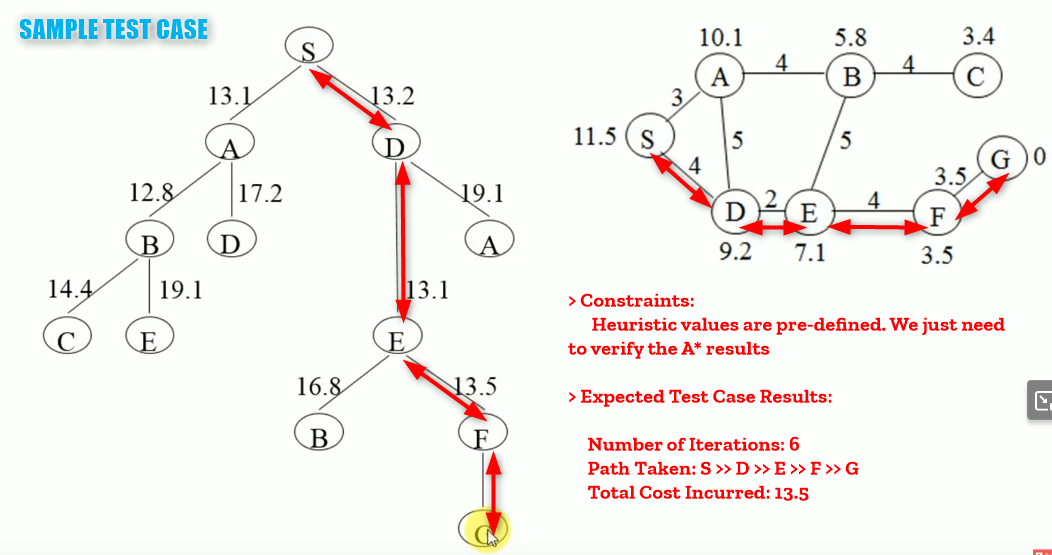

In [3]:
# Test Case for Above Problem

# Initialize the Graph
graph = AStar()

# Register the Travel Costs
graph.register_input_cost('S, A, 1, 3')
graph.register_input_cost('S, D, 1, 4')
graph.register_input_cost('A, B, 1, 4')
graph.register_input_cost('B, C, 1, 4')
graph.register_input_cost('B, E, 1, 5')
graph.register_input_cost('A, D, 1, 5')
graph.register_input_cost('D, E, 1, 2')
graph.register_input_cost('E, F, 1, 4')
graph.register_input_cost('F, G, 1, 3.5')

# Register the start and end node
graph.register_start_end_node('S, G')

# Convert Costs Recorded into a 2D representaton of graph
graph.convert_to_2D_graph()

# Pretty Print the matrix to verify inputs
graph.print_matrix()

| / | S | A | D | B | C | E | F | G 

| S | - |3.0|4.0| - | - | - | - | - 

| A |3.0| - |5.0|4.0| - | - | - | - 

| D |4.0|5.0| - | - | - |2.0| - | - 

| B | - |4.0| - | - |4.0|5.0| - | - 

| C | - | - | - |4.0| - | - | - | - 

| E | - | - |2.0|5.0| - | - |4.0| - 

| F | - | - | - | - | - |4.0| - |3.5

| G | - | - | - | - | - | - |3.5| - 



In [4]:
# Feed the pre-defined Heuristic Values to the graph
graph.heuristic_values = {'S': 11.5, 'A': 10.1, 'D': 9.2, 'B': 5.8, 'C': 3.4, 'E': 7.1, 'F': 3.5, 'G': 0}

# Perform the A* Calculation
graph.perform_a_star_calculation()



-------- Start of Iteration 1 ----------
> Potential Nodes And Cost :
 Node:  S  Potential Cost till Goal:  0
> Expanding Node:  S
-------- End of Iteration 1 ----------


-------- Start of Iteration 2 ----------
> Potential Nodes And Cost :
 Node:  A  Potential Cost till Goal:  13.1
 Node:  D  Potential Cost till Goal:  13.2
> Expanding Node:  A
-------- End of Iteration 2 ----------


-------- Start of Iteration 3 ----------
> Potential Nodes And Cost :
 Node:  D  Potential Cost till Goal:  13.2
 Node:  D  Potential Cost till Goal:  17.2
 Node:  B  Potential Cost till Goal:  12.8
> Expanding Node:  B
-------- End of Iteration 3 ----------


-------- Start of Iteration 4 ----------
> Potential Nodes And Cost :
 Node:  D  Potential Cost till Goal:  13.2
 Node:  D  Potential Cost till Goal:  17.2
 Node:  C  Potential Cost till Goal:  14.4
 Node:  E  Potential Cost till Goal:  19.1
> Expanding Node:  D
-------- End of Iteration 4 ----------


-------- Start of Iteration 5 ----------
> 

## Test Case of Assignment Problem

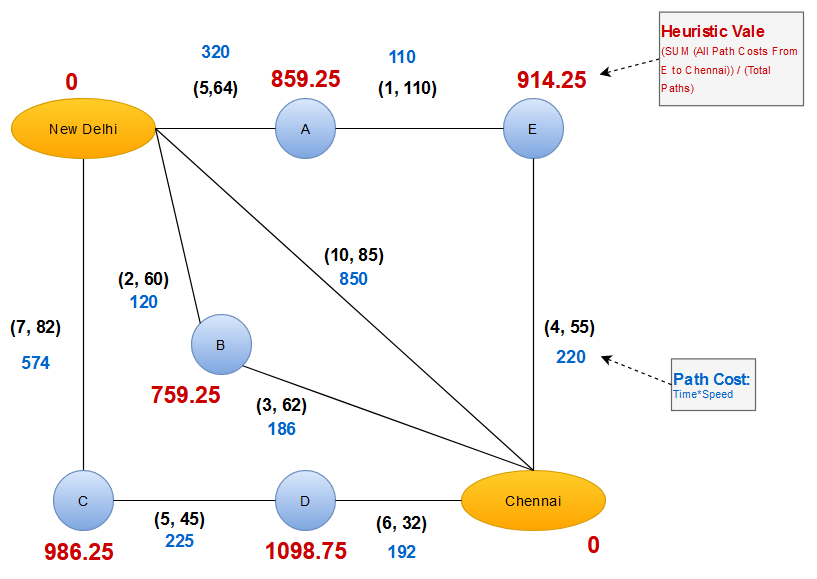

In [5]:
# Test Case for Assignment Problem
graph = AStar()
graph.register_input_cost('New Delhi, A, 5, 64')
graph.register_input_cost('A, E, 1, 110')
graph.register_input_cost('New Delhi, Chennai, 10, 85')
graph.register_input_cost('New Delhi, B, 2, 60')
graph.register_input_cost('B, Chennai, 3, 62')
graph.register_input_cost('New Delhi, C, 7, 82')
graph.register_input_cost('C, D, 5, 45')
graph.register_input_cost('D, Chennai, 6, 32')
graph.register_input_cost('E, Chennai, 4, 55')

graph.register_start_end_node('New Delhi, Chennai')

# Convert Costs Recorded into a 2D representaton of graph
graph.convert_to_2D_graph()
graph.print_matrix()

|    /    |New Delhi|    A    |    E    | Chennai |    B    |    C    |    D    

|New Delhi|    -    |  320.0  |    -    |  850.0  |  120.0  |  574.0  |    -    

|    A    |  320.0  |    -    |  110.0  |    -    |    -    |    -    |    -    

|    E    |    -    |  110.0  |    -    |  220.0  |    -    |    -    |    -    

| Chennai |  850.0  |    -    |  220.0  |    -    |  186.0  |    -    |  192.0  

|    B    |  120.0  |    -    |    -    |  186.0  |    -    |    -    |    -    

|    C    |  574.0  |    -    |    -    |    -    |    -    |    -    |  225.0  

|    D    |    -    |    -    |    -    |  192.0  |    -    |  225.0  |    -    



In [6]:
graph.perform_heuristic_calculation()
graph.perform_a_star_calculation()



-------- Start of Iteration 1 ----------
> Potential Nodes And Cost :
 Node:  New Delhi  Potential Cost till Goal:  0
> Expanding Node:  New Delhi
-------- End of Iteration 1 ----------
Goal Reached!


---> Fianl Goal Reached  Chennai

---> Path Taken:  New Delhi >> Chennai

---> Total Atual Cost Incurrend:  850.0
None


In [7]:
graph.heuristic_values

{'New Delhi': 0,
 'A': 859.25,
 'E': 914.25,
 'Chennai': 0,
 'B': 759.25,
 'C': 986.25,
 'D': 1098.75}

## Rough Work of Code

In [ ]:
'''
Calculate AStar()
- Get the pool
- Select the lowest cost node in the pool
- Delete the node from the pool
- And Call the Expand Neighbours function with the node
- 
Expand Neighbors and their costs (actual_cost_til_now, current_node)
- Get All Neighbours
    - (Neighbour 1, actual_cost_till_here + actual_path_cost_till_neighbour + heuristic_of_neighbour, actual_path_cost_till_neighbour)
    - (Neighbour 2, actual_cost_till_here + actual_path_cost_till_neighbour + heuristic_of_neighbour, actual_path_cost_till_neighbour)
    - (Neighbour 3, actual_cost_till_here + actual_path_cost_till_neighbour + heuristic_of_neighbour, actual_path_cost_till_neighbour)
    ...
- Return These Nodes
'''

# # Test Case for Assignment Problem
# graph = Graph()
# graph.register_input_cost('New Delhi, A, 5, 64')
# graph.register_input_cost('A, E, 1, 110')
# graph.register_input_cost('New Delhi, Chennai, 10, 85')
# graph.register_input_cost('New Delhi, B, 2, 60')
# graph.register_input_cost('B, Chennai, 3, 62')
# graph.register_input_cost('New Delhi, C, 7, 82')
# graph.register_input_cost('C, D, 5, 45')
# graph.register_input_cost('D, Chennai, 6, 32')


# graph.register_start_end_node('New Delhi, Chennai')

# # Convert Costs Recorded into a 2D representaton of graph
# graph.convert_to_2D_graph()
# graph.print_matrix()

graph.nodes_registry
graph.nodes_id_registry
graph.total_path_cost
graph.total_unique_paths
graph.heuristic_values
graph.graph_matrix
#print('-')

# 3B - Local Search Algo - Hill Climb Problem and Time/Space Complexity


In [50]:
graph = Graph()

class HillClimb(Graph):

    
    def __init__(self, ):
        super().__init__()
        self.total_path_cost = {}
        self.total_unique_paths = {}
        self.heuristic_values = {}    
        self.NODES_POOL_MAX = 0
        self.MAX_BRANCHING_FACTOR = 0
        self.ITERATION_NUMBER = 0
        self.MAX_DEPTH = 0
       # We keep track of the maximum length of nodes_pool array during a_star calculation
    def update_branching_factor(self, branching_factor_of_node):
        self.MAX_BRANCHING_FACTOR = max(self.MAX_BRANCHING_FACTOR, branching_factor_of_node)
        
    def update_depth(self, nodes_path):
        self.MAX_DEPTH = max(self.MAX_DEPTH, len(nodes_path))
        
    def log_space_complexity(self, nodes_pool):
        self.NODES_POOL_MAX = max(self.NODES_POOL_MAX, len(nodes_pool))
    
    # To Calculate the time complexity, we take into consideration the
    # Number of iterations or the depth of the Graph
    # Time Complexity = b^d where b is the branching factor 
    def generate_time_complexity(self, ):
        print('--------- TIME COMPLEXITY CALCULATIONS ------------')
        print('-> Max Branching Factor (B): ', self.MAX_BRANCHING_FACTOR)
        print('-> Maximum Depth (D): ', self.MAX_DEPTH)
        print('-> Time Complexity (B^D): ', self.MAX_BRANCHING_FACTOR**self.MAX_DEPTH)
        print('--------------------------------------------------')
    
    # The Graph is stored in a nxn grid where n is the number of nodes
    # Hence, nxn is consumed during every execution
    # During the actual execution of A* Algorithm, We maintain a pool of nodes
    # In A*, the maximum size of the bool will be B^D where
    # B is the maximum branching factor of a node
    # and D is the Depth of the Tree or Number of Iterations
    
    def generate_space_complexity(self, ):
        
        print('--------- SPACE COMPLEXITY CALCULATIONS ------------')
        print('1. Space Occupied to Store the 2D Grid Matrix')
        rows = len(self.graph_matrix)
        print('   -> Number of Rows: ', rows)
        if rows:
            columns = len(self.graph_matrix[0])
            print('   -> Number of Columns: ', columns)
        else:
            columns = 1
        print('-> Hence, space to store the grid = M*N = ', rows*columns)
        
        print('2. Maximum Recorded Space Occupied to Store the Pool of Explored Nodes before Goal is reached: ')
        print('-> Space Occupied: ', self.NODES_POOL_MAX)
        
        print('3. Theorotical Time Complexity of the given Execution: ')
        print('-> Max Branching Factor (B): ', self.MAX_BRANCHING_FACTOR)
        print('-> Maximum Depth (D): ', self.MAX_DEPTH)
        print('-> Space Complexity (B^D): ', self.MAX_BRANCHING_FACTOR**self.MAX_DEPTH)
        print('--------------------------------------------------') 
  
    def perform_goal_test(self, pool_of_nodes):
        print("The pool_of_nodes ",pool_of_nodes)
        for node in pool_of_nodes:
            if node['node_name'] == self.end_node:
                return node
        return None
       # We keep track of the maximum length of nodes_pool array during a_star calculation
    def log_space_complexity(self, nodes_pool):
        self.NODES_POOL_MAX = max(self.NODES_POOL_MAX, len(nodes_pool))
    
    # To Calculate the time complexity, we take into consideration the
    # Number of iterations or the depth of the Graph
    # Time Complexity = b^d where b is the branching factor 
    def generate_time_complexity(self, ):
        print('--------- TIME COMPLEXITY CALCULATIONS ------------')
        print('-> Max Branching Factor (B): ', self.MAX_BRANCHING_FACTOR)
        print('-> Maximum Depth (D): ', self.MAX_DEPTH)
        print('-> Time Complexity (B^D): ', self.MAX_BRANCHING_FACTOR**self.MAX_DEPTH)
        print('--------------------------------------------------')
    
    # The Graph is stored in a nxn grid where n is the number of nodes
    # Hence, nxn is consumed during every execution
    # During the actual execution of A* Algorithm, We maintain a pool of nodes
    # In A*, the maximum size of the bool will be B^D where
    # B is the maximum branching factor of a node
    # and D is the Depth of the Tree or Number of Iterations
    def generate_space_complexity(self, ):
        
        print('--------- SPACE COMPLEXITY CALCULATIONS ------------')
        print('1. Space Occupied to Store the 2D Grid Matrix')
        rows = len(self.graph_matrix)
        print('   -> Number of Rows: ', rows)
        if rows:
            columns = len(self.graph_matrix[0])
            print('   -> Number of Columns: ', columns)
        else:
            columns = 1
        print('-> Hence, space to store the grid = M*N = ', rows*columns)
        
        print('2. Maximum Recorded Space Occupied to Store the Pool of Explored Nodes before Goal is reached: ')
        print('-> Space Occupied: ', self.NODES_POOL_MAX)
        
        print('3. Theorotical Time Complexity of the given Execution: ')
        print('-> Max Branching Factor (B): ', self.MAX_BRANCHING_FACTOR)
        print('-> Maximum Depth (D): ', self.MAX_DEPTH)
        print('-> Space Complexity (B*D): ', self.MAX_BRANCHING_FACTOR*self.MAX_DEPTH)
        print('--------------------------------------------------')
        
    def find_min_from_pool(self, pool_of_nodes):
        minimum_cost_node = None 
        for node in pool_of_nodes:
            if minimum_cost_node is None:
                minimum_cost_node = node
            elif node['total_cost_till_goal'] < minimum_cost_node['total_cost_till_goal']:
                minimum_cost_node = node
        return minimum_cost_node

    
    def delete_node_from_pool(self, pool_of_nodes, node):
        try:
            pool_of_nodes.remove(node)
            return True
        except ValueError as e:
            return False
        
    def get_neighbouring_nodes_and_cost(self, current_node):
        neighbour_pool = []
        min_neighbour_pool=[]
        branching_factor_of_node = 0
        # For All the neighbouring nodes of the current node
        for col_index in range(len(self.graph_matrix[self.nodes_registry[current_node['node_name']]-1])):
            # If there exits a Valid Path and the node should not already bein current_node's path
            # Meaning: It should not be already traversed
            if not self.graph_matrix[self.nodes_registry[current_node['node_name']]-1][col_index] is None\
            and not self.nodes_id_registry[col_index+1] in current_node['path']:
                branching_factor_of_node += 1
                neighbouring_node_name = self.nodes_id_registry[col_index+1]
                actual_cost_till_neighbour_node = current_node['actual_cost_till_node'] + self.graph_matrix[self.nodes_registry[current_node['node_name']]-1][col_index]
                estimated_cost_till_goal_node = actual_cost_till_neighbour_node 
                
                path = current_node['path'].copy()
                path.append(neighbouring_node_name)
                self.update_depth(path)
                neighbour_pool.append(
                    {'node_name': neighbouring_node_name, 'actual_cost_till_node': actual_cost_till_neighbour_node, 'total_cost_till_goal': estimated_cost_till_goal_node, 'path': path})
        min_neighbour_pool.append(min(neighbour_pool, key=lambda x: x['actual_cost_till_node']))
        print("The min_neighbour_pool",neighbour_pool)
        self.update_branching_factor(branching_factor_of_node)
        print("The min_neighbour_pool",min_neighbour_pool)
        return min_neighbour_pool
    
    def print_iteration_details(self, iteration_number, minimum_node, nodes_pool):
        print(f'\n\n-------- Start of Iteration {iteration_number+1} ----------')
        print('> Potential Nodes And Cost :')
        for node in nodes_pool:
            print(' Node: ', node['node_name'], ' Potential Cost till Goal: ', node['total_cost_till_goal'])
        print('> Expanding Node: ', minimum_node['node_name'])
        print(f'-------- End of Iteration {iteration_number+1} ----------')
    
    def print_goal_achievement(self, goal_test):
        print('\n\n---> Fianl Goal Reached ', goal_test['node_name'])
        print('\n---> Path Taken: ', ' >> '.join(goal_test['path']))
        print('\n---> Total Atual Cost Incurrend: ', goal_test['actual_cost_till_node'])
        
    def perform_hill_climb_calculation(self, ):
        iteration_number = 0
        self.ITERATION_NUMBER = 0
        self.MAX_BRANCHING_FACTOR = 0
        self.MAX_DEPTH = 0
        # Start with the starting node only
        nodes_pool = [{'node_name': self.start_node, 'actual_cost_till_node': 0, 'total_cost_till_goal': 0, 'path':[self.start_node, ]}]
        
        # Try to check if any of nodes is Goal Node
        # Ideally this will be true only if start_node = end_node
        goal_test = self.perform_goal_test(nodes_pool)
        
        while len(nodes_pool) and not goal_test:
            minimum_node = self.find_min_from_pool(nodes_pool)
            self.print_iteration_details(iteration_number, minimum_node, nodes_pool)
            if not minimum_node is None:
                nodes_pool=(self.get_neighbouring_nodes_and_cost(minimum_node))
            self.delete_node_from_pool(nodes_pool, minimum_node)
            print("The nodes pool is",nodes_pool)
            
            goal_test = self.perform_goal_test(nodes_pool)
            if goal_test:
                print('Goal Reached!')
            
            iteration_number +=1
        
        print(self.print_goal_achievement(goal_test))
        self.generate_time_complexity()
        self.generate_space_complexity()

In [51]:
graph = HillClimb()
graph.register_input_cost('New Delhi, A, 5, 64')
graph.register_input_cost('A, E, 1, 110')
graph.register_input_cost('New Delhi, Chennai, 10, 85')
graph.register_input_cost('New Delhi, B, 2, 60')
graph.register_input_cost('B, Chennai, 3, 62')
graph.register_input_cost('New Delhi, C, 7, 82')
graph.register_input_cost('C, D, 5, 45')
graph.register_input_cost('D, Chennai, 6, 32')
graph.register_input_cost('E, Chennai, 4, 55')

graph.register_start_end_node('New Delhi, Chennai')

# Convert Costs Recorded into a 2D representaton of graph
graph.convert_to_2D_graph()
graph.print_matrix()

|    /    |New Delhi|    A    |    E    | Chennai |    B    |    C    |    D    

|New Delhi|    -    |  320.0  |    -    |  850.0  |  120.0  |  574.0  |    -    

|    A    |  320.0  |    -    |  110.0  |    -    |    -    |    -    |    -    

|    E    |    -    |  110.0  |    -    |  220.0  |    -    |    -    |    -    

| Chennai |  850.0  |    -    |  220.0  |    -    |  186.0  |    -    |  192.0  

|    B    |  120.0  |    -    |    -    |  186.0  |    -    |    -    |    -    

|    C    |  574.0  |    -    |    -    |    -    |    -    |    -    |  225.0  

|    D    |    -    |    -    |    -    |  192.0  |    -    |  225.0  |    -    



In [52]:
graph.perform_hill_climb_calculation()

The pool_of_nodes  [{'node_name': 'New Delhi', 'actual_cost_till_node': 0, 'total_cost_till_goal': 0, 'path': ['New Delhi']}]


-------- Start of Iteration 1 ----------
> Potential Nodes And Cost :
 Node:  New Delhi  Potential Cost till Goal:  0
> Expanding Node:  New Delhi
-------- End of Iteration 1 ----------
The min_neighbour_pool [{'node_name': 'A', 'actual_cost_till_node': 320.0, 'total_cost_till_goal': 320.0, 'path': ['New Delhi', 'A']}, {'node_name': 'Chennai', 'actual_cost_till_node': 850.0, 'total_cost_till_goal': 850.0, 'path': ['New Delhi', 'Chennai']}, {'node_name': 'B', 'actual_cost_till_node': 120.0, 'total_cost_till_goal': 120.0, 'path': ['New Delhi', 'B']}, {'node_name': 'C', 'actual_cost_till_node': 574.0, 'total_cost_till_goal': 574.0, 'path': ['New Delhi', 'C']}]
The min_neighbour_pool [{'node_name': 'B', 'actual_cost_till_node': 120.0, 'total_cost_till_goal': 120.0, 'path': ['New Delhi', 'B']}]
The nodes pool is [{'node_name': 'B', 'actual_cost_till_node': 120.0, '

In [46]:
# 5 - Time and Space Complexity

In [ ]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented

### 2.	Definition of Algorithm 1 (Mention the Name of the algorithm here)

In [ ]:
#Code Block : Function for algorithm 1 implementation

### 3.	Definition of Algorithm 2 (Mention the Name of the algorithm here)

In [ ]:
#Code Block : Function for algorithm 2 implementation

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [ ]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

### 5.	Comparitive Analysis

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : _______________________________________________

________________________________________________________

_________________________________________________________